In [1]:
# Imports

import csv
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gloabl variables

SEVEN_COLORS = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600']
SIX_COLORS = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
FIVE_COLORS = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Convenience function

def remove_spines(axes):
    for spine in ('right', 'top'):
        axes.spines[spine].set_visible(False)

In [2]:
# Create an figures directory and function that saves images.

os.makedirs('figures', exist_ok=True)

IMAGES_PATH = os.path.join('.', 'figures')

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=1000):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Create a function that reads the data files.

DATA_PATH = os.path.join('.', 'data')

def load_data_files(path=DATA_PATH):
    for file in os.listdir(path):
        with open(os.path.join(path, file)) as csv_file:
            yield csv.reader(csv_file)

In [4]:
# Function that counts the number of peeks and the time spent peeking per question

def get_peek_data(data_file):
    peek_data = []
    current_question_number = -1
    total_peek_time = 0
    total_peek_count = 0
    peek_time = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            peek_data.append({'peek_time': total_peek_time, 'peek_count': total_peek_count})
            total_peek_count = 0
            total_peek_time = 0
            continue

        if entry[2] == 'peek':
            data = ast.literal_eval(entry[3])
            if data['peeking']:
                peek_time = time
                total_peek_count += 1
            else:
                total_peek_time += time - peek_time
                
    return peek_data

In [5]:
# Gather data and create a peek dataframe

from itertools import repeat, cycle

def repeated_int(repeats, start=1, stop=19):
    for i in range(start, stop):
        for _ in range(repeats):
            yield i
        
peek_df = pd.DataFrame(index=range(1, 8))

for i, data_file in enumerate(load_data_files(), start=1):
    peek_data = get_peek_data(data_file)
    temp = pd.DataFrame(peek_data)
    temp.rename(columns={'peek_time': f'{i}time', 'peek_count': f'{i}count'}, inplace=True)
    peek_df = peek_df.join(temp)

outer = list(repeated_int(2))
inner = cycle(['time', 'count'])
hier_index = list(zip(outer, inner))
peek_df.columns = pd.MultiIndex.from_tuples(hier_index)

peek_df

1          2                3                4                5   \
        time count time count       time count       time count       time   
1    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0  221.80032   
2    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0   63.43676   
3  548.71831   2.0  0.0   0.0  629.50920   1.0    0.00000   0.0  120.58694   
4    0.00000   0.0  0.0   0.0  242.37150   2.0  689.42874   1.0  191.81875   
5    0.00000   0.0  0.0   0.0  181.79732   1.0  362.83408   3.0  218.71431   
6        NaN   NaN  0.0   0.0        NaN   NaN        NaN   NaN  243.12177   
7        NaN   NaN  NaN   NaN        NaN   NaN        NaN   NaN    0.00000   

         ...   14         15               16                17        \
  count  ... time count time count       time count        time count   
1     3  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
2     7  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
3     6  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
4     5  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
5     2  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
6     5  ...  0.0   0.0  NaN   NaN    0.00000     0  1097.75877   1.0   
7     0  ...  NaN   NaN  NaN   NaN  592.83671     2         NaN   NaN   

          18        
        time count  
1  236.10098   1.0  
2    0.00000   0.0  
3    0.00000   0.0  
4  796.98482   1.0  
5        NaN   NaN  
6        NaN   NaN  
7        NaN   NaN  

[7 rows x 36 columns]

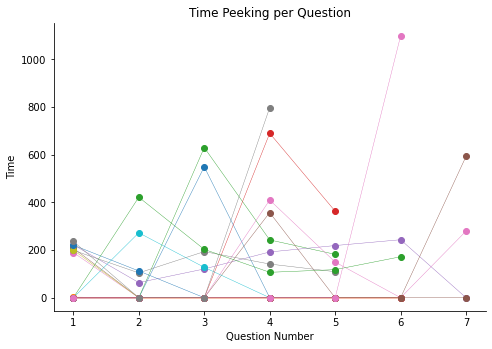

In [6]:
# Plotting time spent peeking per question for each participant

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for i in range(1, 19):
    ax.plot(peek_df[i]['time'], lw=0.4, marker='o')

ax.set_xlabel('Question Number')
ax.set_ylabel('Time')
ax.set_title('Time Peeking per Question')

remove_spines(ax)

In [7]:
peek_df

1          2                3                4                5   \
        time count time count       time count       time count       time   
1    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0  221.80032   
2    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0   63.43676   
3  548.71831   2.0  0.0   0.0  629.50920   1.0    0.00000   0.0  120.58694   
4    0.00000   0.0  0.0   0.0  242.37150   2.0  689.42874   1.0  191.81875   
5    0.00000   0.0  0.0   0.0  181.79732   1.0  362.83408   3.0  218.71431   
6        NaN   NaN  0.0   0.0        NaN   NaN        NaN   NaN  243.12177   
7        NaN   NaN  NaN   NaN        NaN   NaN        NaN   NaN    0.00000   

         ...   14         15               16                17        \
  count  ... time count time count       time count        time count   
1     3  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
2     7  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
3     6  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
4     5  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
5     2  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
6     5  ...  0.0   0.0  NaN   NaN    0.00000     0  1097.75877   1.0   
7     0  ...  NaN   NaN  NaN   NaN  592.83671     2         NaN   NaN   

          18        
        time count  
1  236.10098   1.0  
2    0.00000   0.0  
3    0.00000   0.0  
4  796.98482   1.0  
5        NaN   NaN  
6        NaN   NaN  
7        NaN   NaN  

[7 rows x 36 columns]

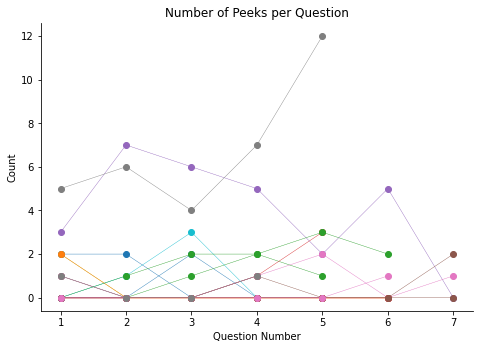

In [8]:
# Plotting number of peeks per question for each participant

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for i in range(1, 19):
    ax.plot(peek_df[i]['count'], lw=0.4, marker='o')

ax.set_xlabel('Question Number')
ax.set_ylabel('Count')
ax.set_title('Number of Peeks per Question')

remove_spines(ax)

In [9]:
# Remove anomalous value

peek_df = peek_df[peek_df < 1000]
peek_df.loc[6][17]

time     NaN
count    1.0
Name: 6, dtype: float64

In [10]:
# Generate a data analysis dataframe containing: Number of Students; Mean Time; Number of Peeks; Number of Peeking Students; and Percentage of Peeking Students per question

import math

data = []

for i in range(1, 8):
    total = 0
    n = 0
    m = 0
    count = 0
    
    for j in range(1, 19):
        value = peek_df.loc[i].loc[j]
        if not math.isnan(value['time']):
            total += value['time']
            n += 1
            count += value['count']
            if value['count']:
                m += 1 

    data.append([n, total/n, int(count), m, m/n])
    
peek_analysis = pd.DataFrame(data, 
                           columns=['Number of Students', "Mean Time", "Number of Peeks", "Number of Peeking Students", "Percentage of Peeking Students"], 
                           index=range(1, 8))

In [11]:
peek_analysis

,Number of Students,Mean Time,Number of Peeks,Number of Peeking Students,Percentage of Peeking Students
1,18,82.040849,17,8,0.444444
2,18,54.073831,17,5,0.277778
3,17,107.186774,18,6,0.352941
4,17,172.636830,20,8,0.470588
5,14,81.390376,23,6,0.428571
6,7,59.270720,7,2,0.285714
7,4,218.066597,3,2,0.500000


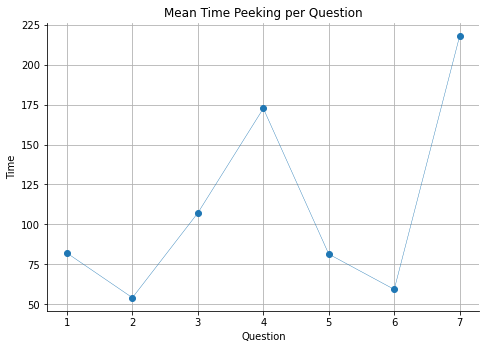

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(peek_analysis['Mean Time'], marker='o', linewidth=0.4)
ax.grid()

ax.set_xlabel('Question')
ax.set_ylabel('Time')
ax.set_title('Mean Time Peeking per Question')

remove_spines(ax)

**Hypothesis:** Question 4 may have seen an increase in the number of peeks because that question introduces negative numbers. Students claim to find negative numbers harder (verify conjecture with interview data), and hence used the ability to peek a bit more to help them with the sums. 

This may reveal a hidden benefit of the app, which is the peek function helps to lift the cognitive load of the task.

In [ ]:
# Create a time-series graph of times peeked and times submitted

In [13]:
# Function that gets the time spent per question per participant

def get_question_time(data_file):
    time_data = []
    current_question_number = -1
    question_start = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            time_data.append(time - question_start)
            question_start = time
                
    return time_data

In [14]:
data = []

for data_file in load_data_files():
    data.append(get_question_time(data_file))
    
time_df = pd.DataFrame(data).T

time_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,361.43308,364.09347,333.05694,374.27640,360.11940,363.86792,312.69276,414.73096,342.76708,140.77428,331.48510,281.47212,391.92017,328.04950,376.01203,321.51908,365.21325,33.32783
1,185.91837,103.80089,286.31530,205.18504,118.41184,233.44935,259.15248,117.66605,160.08112,104.97257,139.31963,115.55236,151.68143,223.07986,282.46171,53.09618,217.12745,351.54543
2,148.21397,123.27620,235.27314,157.12966,95.29655,108.10875,119.41587,128.30431,269.90233,88.78574,139.36521,77.08189,247.14384,181.16783,402.56920,57.94899,169.83758,239.10164
3,163.89133,93.86848,176.98569,183.99115,162.93419,95.52330,142.09683,148.87605,198.50245,177.30331,181.21187,93.54671,124.32220,153.70228,NaN,81.12442,236.69117,216.45674
4,131.67476,126.49270,234.85042,291.20052,243.03411,127.47101,158.21529,144.84557,135.62425,124.81044,116.84790,84.07792,183.36613,155.55137,NaN,72.40395,142.03917,226.41731
5,175.90080,123.81758,153.27895,203.54181,348.00385,173.92645,141.22928,116.34497,NaN,NaN,153.94744,127.48689,152.63016,207.03221,NaN,82.29181,189.31898,NaN
6,NaN,61.97268,NaN,NaN,128.97284,136.56927,169.14273,NaN,NaN,NaN,NaN,NaN,222.90900,91.27005,NaN,101.61393,151.35068,NaN
7,NaN,NaN,NaN,NaN,4.03203,211.26618,118.39629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.51847,NaN,NaN


In [15]:
# Remove the first row (since this is the tutorial)

time_df = time_df.drop(0)

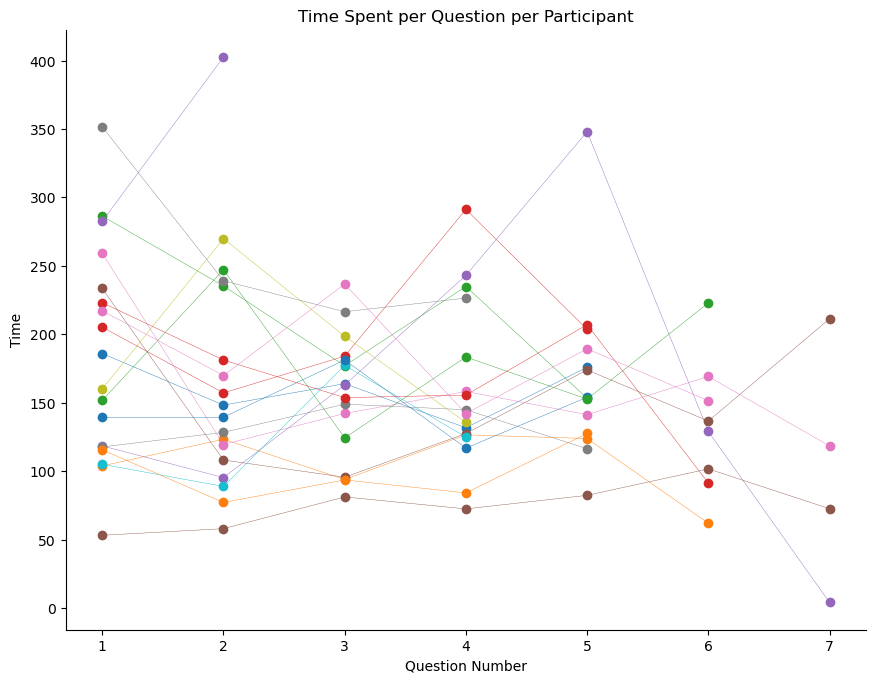

In [16]:
fig = plt.figure(figsize=(8,6), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(time_df, marker='o', linewidth=0.3)
ax.set_xlabel('Question Number')
ax.set_ylabel('Time')
ax.set_title('Time Spent per Question per Participant')

remove_spines(ax)

In [17]:
# Mean Time per Question

time_df.mean(axis=1)

1    183.823170
2    165.995706
3    154.766363
4    158.760166
5    167.767941
6    132.975147
7    101.553242
dtype: float64

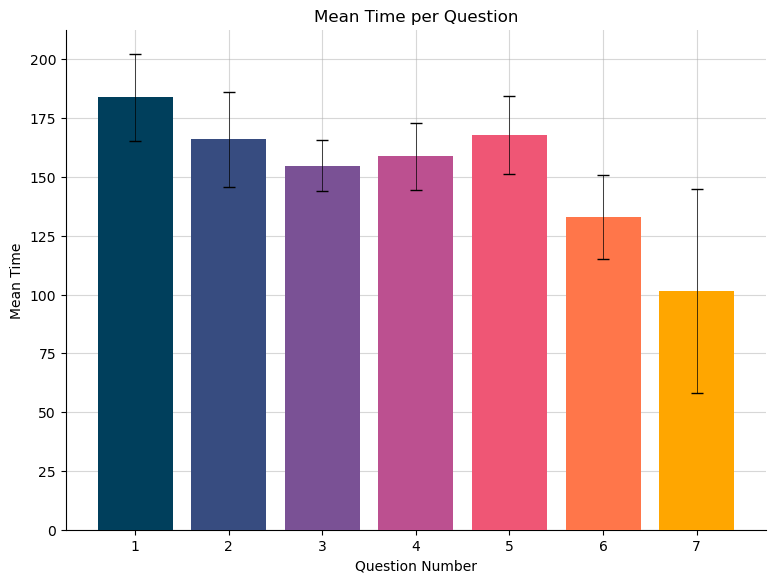

In [18]:
fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(x=range(1,8), height=time_df.mean(axis=1), color=SEVEN_COLORS, zorder=3,
         yerr=time_df.std(axis=1)/(time_df.count(axis=1)**0.5), error_kw={'capsize': 4, 'elinewidth': 0.5})
ax.grid(alpha = 0.5, zorder=0)
ax.set_xlabel('Question Number')
ax.set_ylabel('Mean Time')
ax.set_title('Mean Time per Question')

remove_spines(ax)

In [ ]:
# Explore peeking behaviours in relationship to correct responses. (literature on: temprament and strategies used)

# Focus on on individual students - pick out five students that peeked all the time and five students that peeked
# rarely.



In [19]:
# Create a path to the cleaned data files.

CLEAN_DATA_PATH = os.path.join('.', 'data-clean')

In [20]:
# Function that gets the number of correct responses per question

def get_correct(data_file):
    correct_data = []
    current_question_number = -1
    number_of_correct = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            correct_data.append(number_of_correct)
            number_of_correct = 0
            continue
            
        if current_question_number == -1:
            continue
        
        if entry[2] == 'solution':
            try:
                data = ast.literal_eval(entry[3][6:-1])
                if data['correct']:
                    number_of_correct += 1
            except:
                continue
                
    return correct_data

In [21]:
data = []
for data_file in load_data_files(CLEAN_DATA_PATH):
    data.append(get_correct(data_file))
    
correct_df = pd.DataFrame(data).T
correct_df = correct_df.drop(0)

correct_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,4.0,0.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,0.0
2,5.0,4.0,3.0,5.0,2.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,4.0,4.0,0.0,5.0,4.0,2.0
3,3.0,5.0,5.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,NaN,5.0,4.0,1.0
4,5.0,4.0,5.0,4.0,3.0,4.0,5.0,3.0,5.0,4.0,3.0,5.0,5.0,2.0,NaN,5.0,5.0,3.0
5,5.0,5.0,4.0,4.0,1.0,0.0,5.0,5.0,NaN,NaN,5.0,5.0,4.0,1.0,NaN,5.0,5.0,NaN
6,NaN,5.0,NaN,NaN,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,4.0,NaN
7,NaN,NaN,NaN,NaN,0.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [22]:
correct_df.mean(axis=1)

1    3.500000
2    3.777778
3    3.647059
4    4.117647
5    3.857143
6    4.375000
7    2.750000
dtype: float64

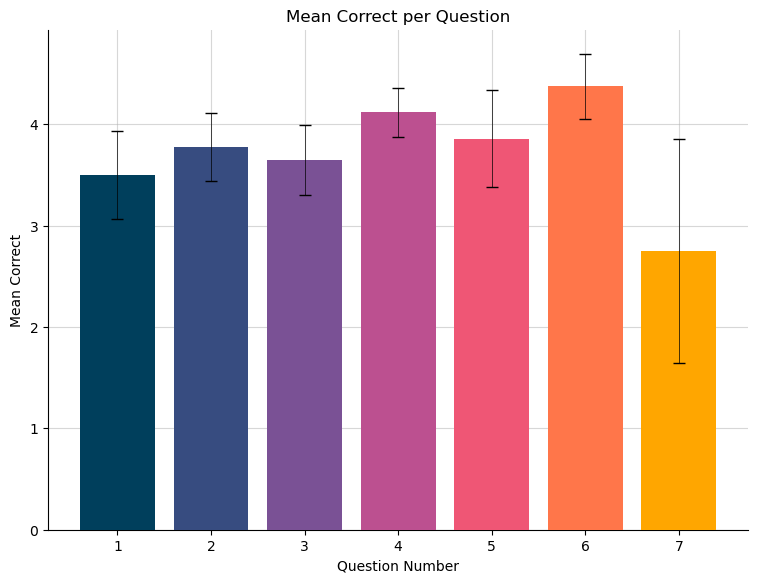

In [23]:
fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(x=range(1,8), height=correct_df.mean(axis=1), color=SEVEN_COLORS, zorder=3,
         yerr=correct_df.std(axis=1)/(time_df.count(axis=1)**0.5), error_kw={'capsize': 4, 'elinewidth': 0.5})
ax.grid(alpha = 0.5, zorder=0)

ax.set_xlabel('Question Number')
ax.set_ylabel('Mean Correct')
ax.set_title('Mean Correct per Question')

remove_spines(ax)

In [24]:
# Calculating the correct number of responses per second

cps_df = correct_df / time_df

cps_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0.021515,0.000000,0.003493,0.014621,0.025335,0.021418,0.019294,0.042493,0.031234,0.047631,0.021533,0.043270,0.026371,0.017931,0.00354,0.094169,0.023028,0.000000
2,0.033735,0.032447,0.012751,0.031821,0.020987,0.037000,0.041870,0.031176,0.018525,0.056315,0.014351,0.064866,0.016185,0.022079,0.00000,0.086283,0.023552,0.008365
3,0.018305,0.053266,0.028251,0.010870,0.024550,0.041875,0.021112,0.026868,0.020151,0.005640,0.011037,0.053449,0.040218,0.032530,NaN,0.061634,0.016900,0.004620
4,0.037972,0.031622,0.021290,0.013736,0.012344,0.031380,0.031603,0.020712,0.036867,0.032049,0.025674,0.059469,0.027268,0.012857,NaN,0.069057,0.035202,0.013250
5,0.028425,0.040382,0.026096,0.019652,0.002874,0.000000,0.035403,0.042976,NaN,NaN,0.032479,0.039220,0.026207,0.004830,NaN,0.060759,0.026410,NaN
6,NaN,0.080681,NaN,NaN,0.023261,0.021967,0.029561,NaN,NaN,NaN,NaN,NaN,0.022431,0.054782,NaN,0.049206,0.026429,NaN
7,NaN,NaN,NaN,NaN,0.000000,0.018933,0.016892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068948,NaN,NaN


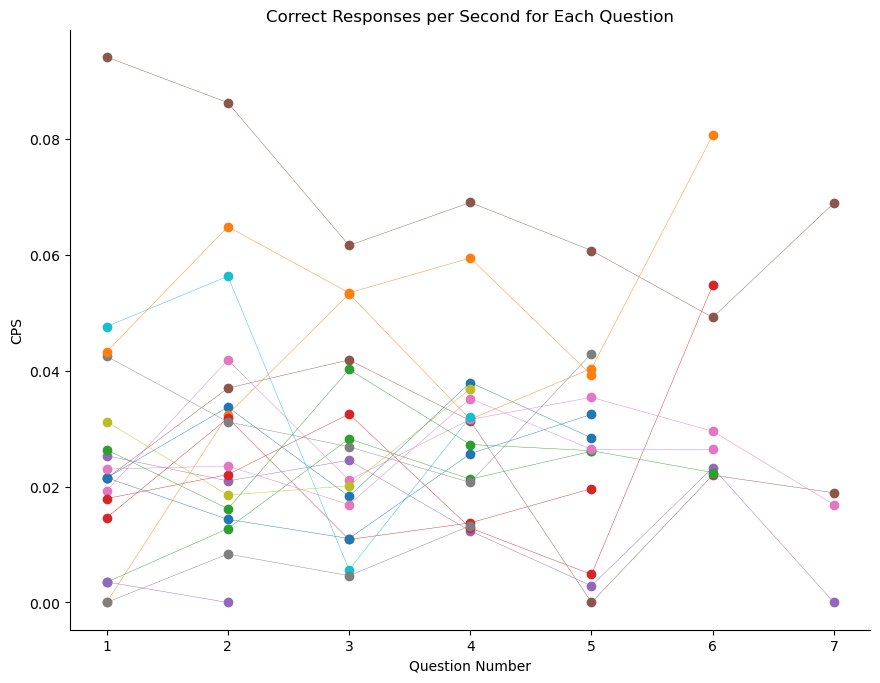

In [25]:
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(cps_df, marker='o', linewidth=0.3)
ax.set_xlabel('Question Number')
ax.set_ylabel('CPS')
ax.set_title('Correct Responses per Second for Each Question')

remove_spines(ax)

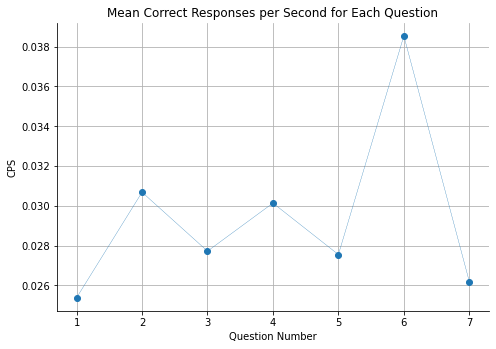

In [26]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(cps_df.mean(axis=1), marker='o', linewidth=0.3)
ax.grid()
ax.set_xlabel('Question Number')
ax.set_ylabel('CPS')
ax.set_title('Mean Correct Responses per Second for Each Question')

remove_spines(ax)

In [27]:
# Function that gets the number of correct responses and category of correct response per question

def get_correct_category(data_file):
    category_data = []
    current_question_number = -1
    correct_category = {}

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            category_data.append(correct_category)
            correct_category = {}
            continue
            
        if current_question_number == -1:
            continue
        
        if entry[2] == 'solution':
            try:
                data = ast.literal_eval(entry[3])
            except:
                continue
            for key, value in data.items():
                correct_category[key] = 1 if value['correct'] else 0
            
    return category_data[1:]

In [28]:
cat_df = pd.DataFrame(index=range(7))

for i, data_file in enumerate(load_data_files()):
    data = get_correct_category(data_file)
    temp = pd.DataFrame(data)
    column_names = {str(j): f"{i}{j}" for j in range(5)}
    temp.rename(columns=column_names, inplace=True)
    cat_df = cat_df.join(temp)
    
outer = list(repeated_int(5))
inner = cycle(range(5))
heir_columns = list(zip(outer, inner))
cat_df.columns = pd.MultiIndex.from_tuples(heir_columns)

cat_df

1                        2                       ...   17                 \
     0    1    2    3    4    0    1    2    3    4  ...    0    1    2    3   
0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  ...  1.0  1.0  1.0  1.0   
4  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  0.0   
5  NaN  NaN  NaN  NaN  NaN  0.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  0.0   
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

         18                      
     4    0    1    2    3    4  
0  1.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  1.0  1.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  1.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  0.0  0.0  
4  0.0  NaN  NaN  NaN  NaN  NaN  
5  0.0  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  

[7 rows x 90 columns]

In [29]:
data = []
for row in range(7):
    question = []
    for step in range(5):
        step_total = 0
        for participant in range(1, 19):
            if not math.isnan(cat_df.loc[row][participant][step]):
                step_total += cat_df.loc[row][participant][step]
        question.append(step_total)
    data.append(question)

cat_totals = pd.DataFrame(data)
cat_totals.index = range(1, 8)
cat_totals = cat_totals.join(peek_analysis['Number of Students'])

for i in range(5):
    cat_totals[f'percent_{i}'] = cat_totals[i]/cat_totals['Number of Students']

cat_totals

,0,1,2,3,4,Number of Students,percent_0,percent_1,percent_2,percent_3,percent_4
1,15.0,12.0,13.0,12.0,10.0,18,0.833333,0.666667,0.722222,0.666667,0.555556
2,16.0,14.0,14.0,13.0,11.0,18,0.888889,0.777778,0.777778,0.722222,0.611111
3,12.0,13.0,10.0,11.0,11.0,17,0.705882,0.764706,0.588235,0.647059,0.647059
4,8.0,17.0,12.0,13.0,13.0,17,0.470588,1.000000,0.705882,0.764706,0.764706
5,8.0,9.0,7.0,11.0,8.0,14,0.571429,0.642857,0.500000,0.785714,0.571429
6,4.0,6.0,5.0,6.0,5.0,7,0.571429,0.857143,0.714286,0.857143,0.714286
7,3.0,3.0,2.0,1.0,1.0,4,0.750000,0.750000,0.500000,0.250000,0.250000


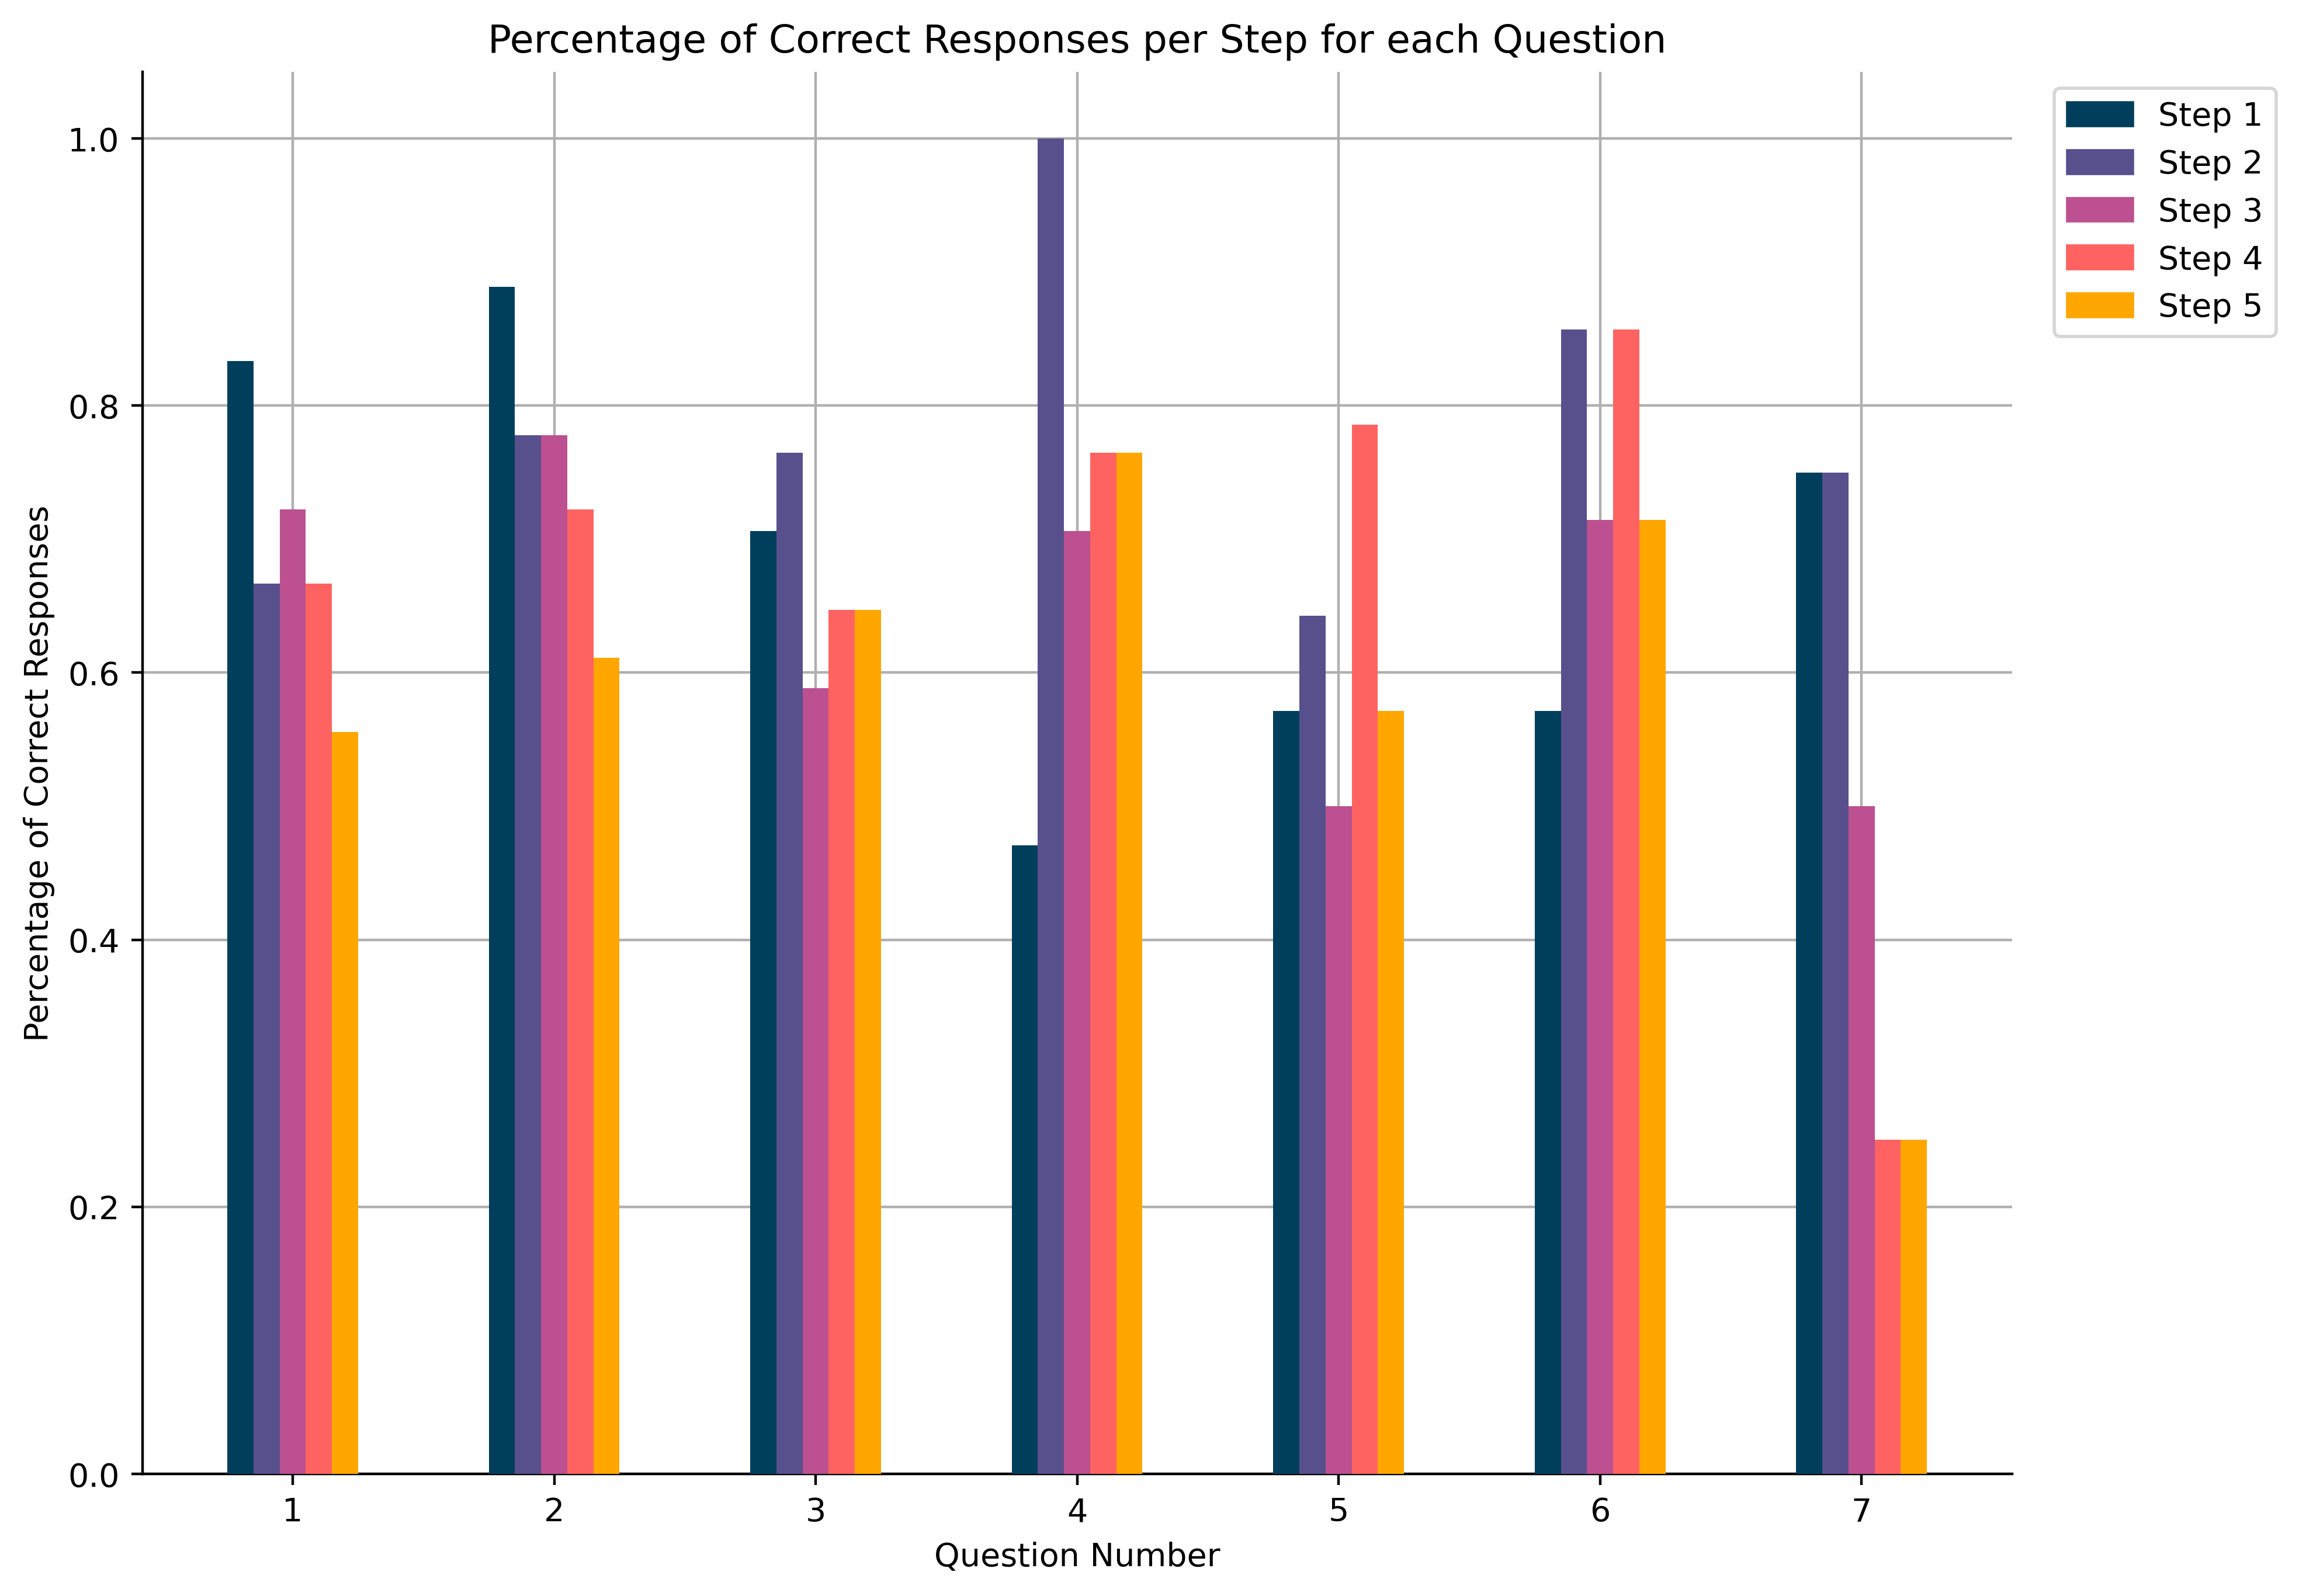

In [30]:
import matplotlib.patches as mpatches

handles = [mpatches.Patch(color=c, label=f'Step {i}') for i, c in enumerate(FIVE_COLORS, start=1)]

fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.add_axes([0, 0, 1, 1])

x = np.arange(1, 8)
width = 0.1

for j, i in enumerate(range(2, -3, -1)):
    ax.bar(x - (i*width), cat_totals[j]/cat_totals['Number of Students'], width, zorder=3, color=FIVE_COLORS[j])
    
ax.grid(zorder=0)

ax.legend(handles=handles, loc=0, bbox_to_anchor=(1.15, 1))

ax.set_xlabel('Question Number')
ax.set_ylabel('Percentage of Correct Responses')
ax.set_title('Percentage of Correct Responses per Step for each Question')

remove_spines(ax)

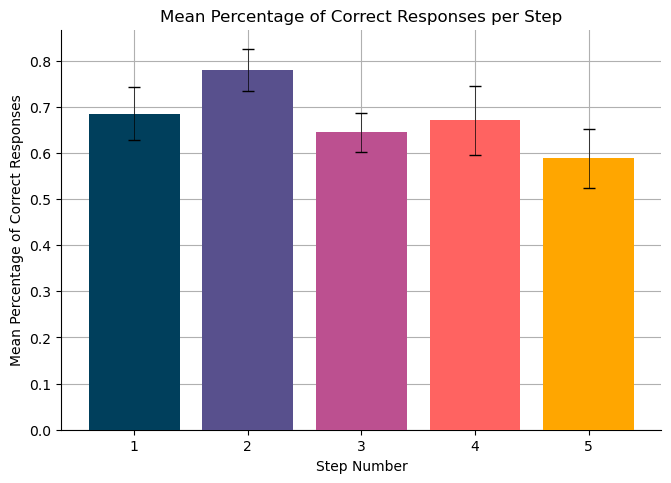

In [31]:
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

x = np.arange(1, 6)

ax.bar(x, cat_totals.mean(axis=0)[6:], color=FIVE_COLORS, zorder=3,
       yerr=cat_totals.std(axis=0)[6:]/(cat_totals.count(axis=0)[6:]**0.5), 
       error_kw={'capsize': 4, 'elinewidth': 0.5})

ax.grid(zorder=0)

ax.set_xlabel('Step Number')
ax.set_ylabel('Mean Percentage of Correct Responses')
ax.set_title('Mean Percentage of Correct Responses per Step')

remove_spines(ax)

In [ ]:
# Look at the types of errors the students are making - is it arithmetic or step. Define arithemtic and what I mean
# by step

In [ ]:
# How would you characterise each particpant? What can you infer qualitatively? Use this to generate hypotheses.

In [ ]:
# These analyses are based on the assumptions that all learners are doing the same thing. Perhaps averaging across
# the sample may not be as sensible.